# Importing neccessaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, rand_score, davies_bouldin_score

## Loading and inspecting the dataset

In [2]:
df = pd.read_csv('dataset.csv')
df = df[['BALANCE', 'PURCHASES']]
df.head()

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BALANCE    8950 non-null   float64
 1   PURCHASES  8950 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [4]:
df.describe()

,BALANCE,PURCHASES
count,8950.000000,8950.000000
mean,1564.474828,1003.204834
std,2081.531879,2136.634782
min,0.000000,0.000000
25%,128.281915,39.635000
50%,873.385231,361.280000
75%,2054.140036,1110.130000
max,19043.138560,49039.570000


In [5]:
df.isnull().sum()

BALANCE      0
PURCHASES    0
dtype: int64

In [6]:
df.nunique()

BALANCE      8871
PURCHASES    6203
dtype: int64

In [7]:
df.shape

(8950, 2)

## Dataset visualization

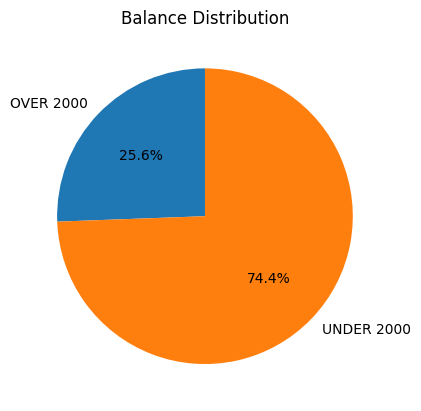

In [8]:
balance_counts = [(df['BALANCE'] > 2000).sum(), (df['BALANCE'] <= 2000).sum()]

plt.pie(balance_counts, labels=['OVER 2000', 'UNDER 2000'], autopct='%1.1f%%', startangle=90)
plt.title('Balance Distribution')
plt.show()

# Clustering data

In [9]:
df = df.dropna()
scaler = StandardScaler()

X = scaler.fit_transform(df)
print(X)

[[-0.73198937 -0.42489974]
 [ 0.78696085 -0.46955188]
 [ 0.44713513 -0.10766823]
 ...
 [-0.7403981  -0.40196519]
 [-0.74517423 -0.46955188]
 [-0.57257511  0.04214581]]


C:\Users\blind\AppData\Local\Temp\ipykernel_12136\599253358.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


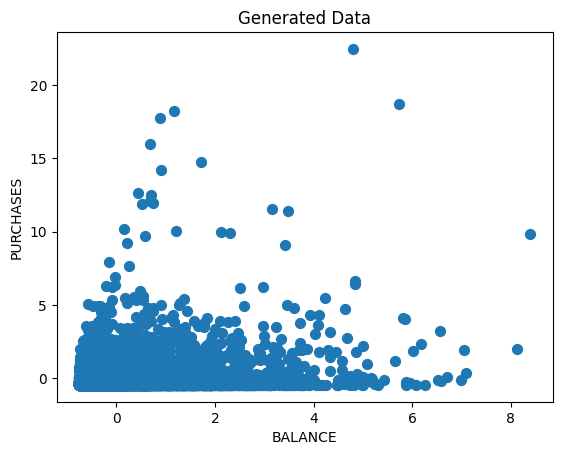

In [10]:
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

## K_means

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

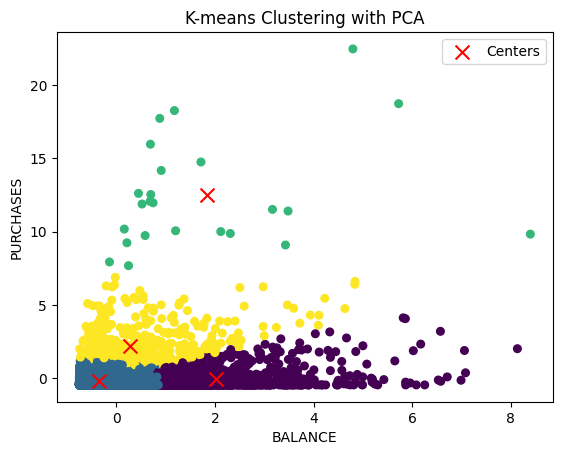

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='red', marker='x', label='Centers')
plt.title("K-means Clustering with PCA")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend()
plt.show()

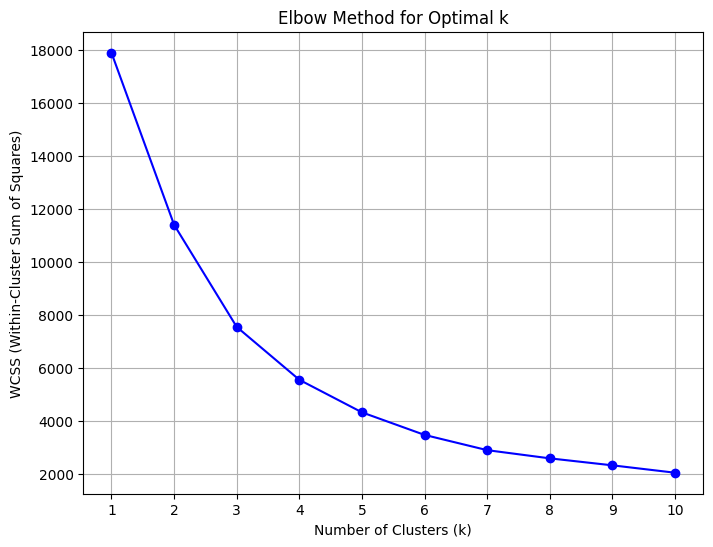

In [13]:
# Elbow Method to determine the optimal k
wcss = []
max_clusters = 10  # You can adjust the range of clusters to test
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


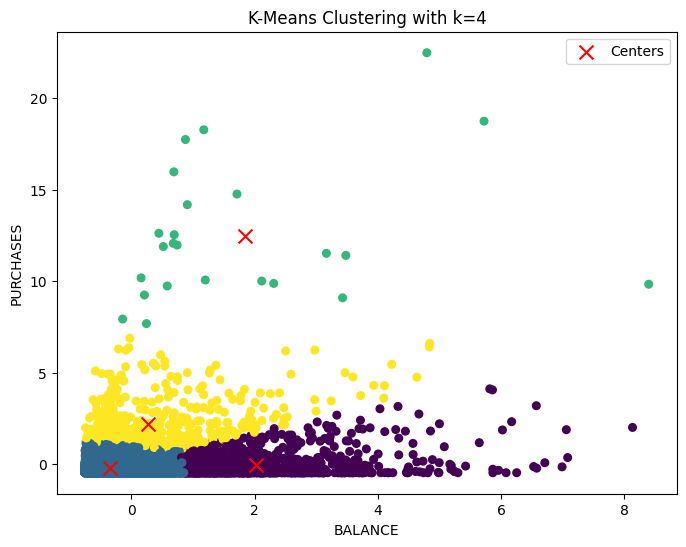

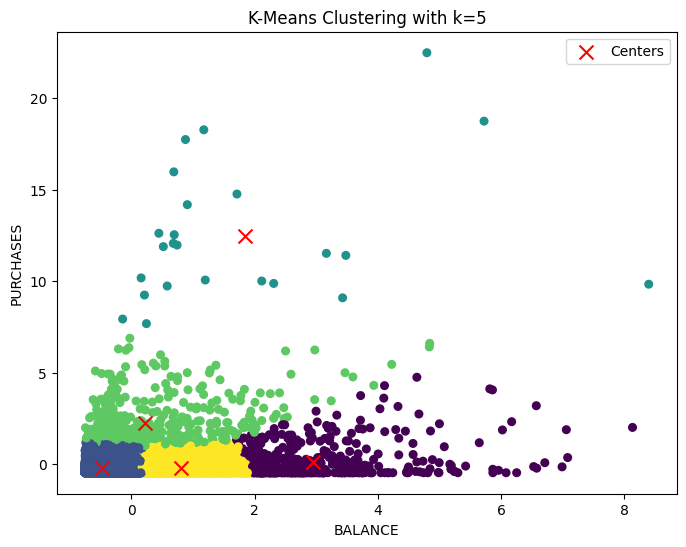

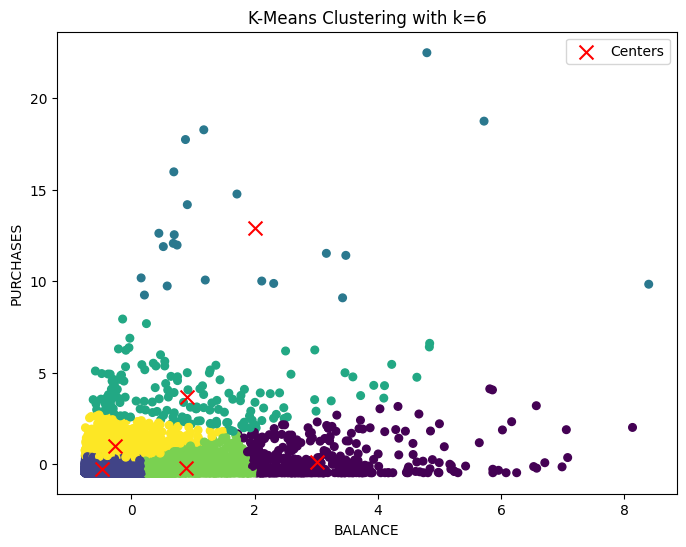

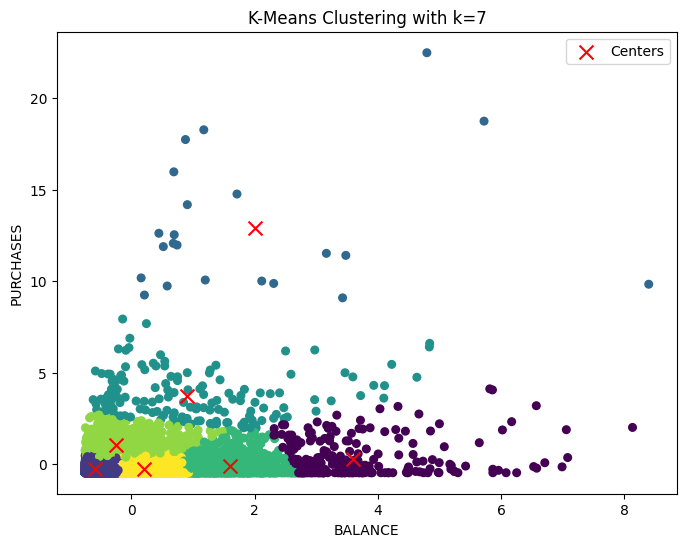

In [14]:
k_values = [4, 5, 6, 7]  # Adjust k-values as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Plot each clustering result
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='red', marker='x', label='Centers')
    plt.title(f"K-Means Clustering with k={k}")
    plt.xlabel("BALANCE")
    plt.ylabel("PURCHASES")
    plt.legend()
    plt.show()


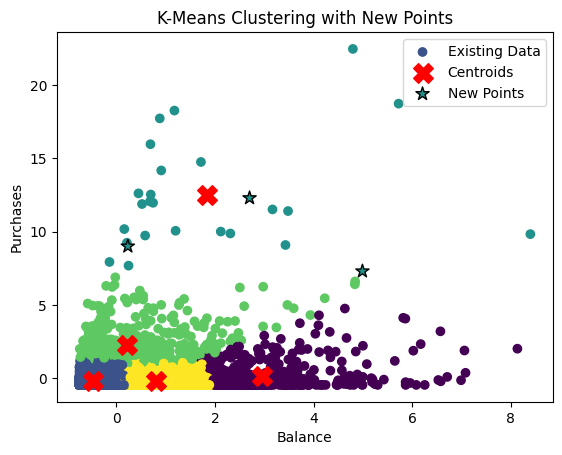

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Predicting the cluster for new data points
new_points = np.array([[2.7, 12.3],
                       [4.99, 7.3],
                       [0.23, 9,]])
predictions = kmeans.predict(new_points)

# Visualize data points with cluster predictions for new points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='Existing Data')  # Visualizing with Balance and Purchases
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Map predictions to colors
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_kmeans))))
new_point_colors = [colors[label] for label in predictions]

# Color new points based on their predicted clusters
plt.scatter(new_points[:, 0], new_points[:, 1], s=100, c=new_point_colors, marker='*', edgecolor='k', label='New Points')
plt.title("K-Means Clustering with New Points")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.legend()
plt.show()

## Hierarchical clustering

### Dendogram

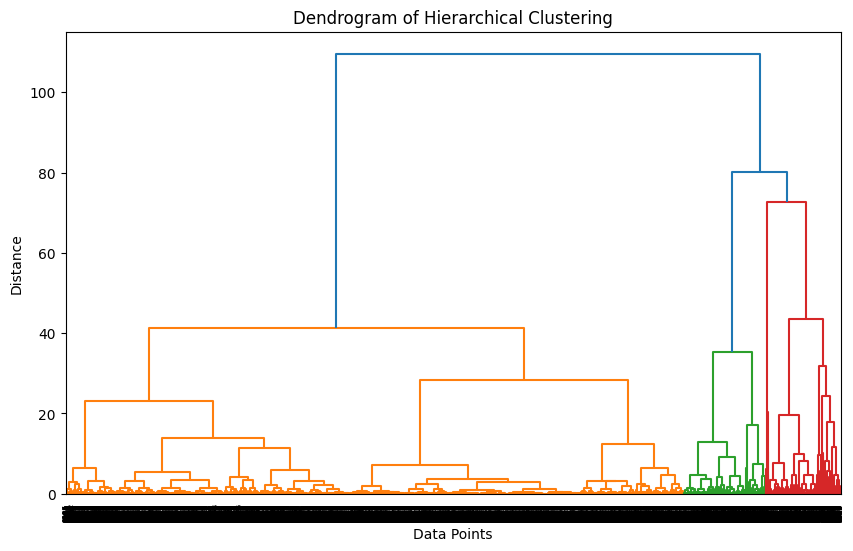

In [16]:
hierarchical = AgglomerativeClustering(n_clusters=5)
y_hc = hierarchical.fit_predict(X)

Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [17]:
# Form flat clusters
max_d = 7  # Set the threshold for cutting the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the DataFrame with cluster labels
df.head()

,BALANCE,PURCHASES,Cluster
0,40.900749,95.40,6
1,3202.467416,0.00,1
2,2495.148862,773.17,1
3,1666.670542,1499.00,3
4,817.714335,16.00,2


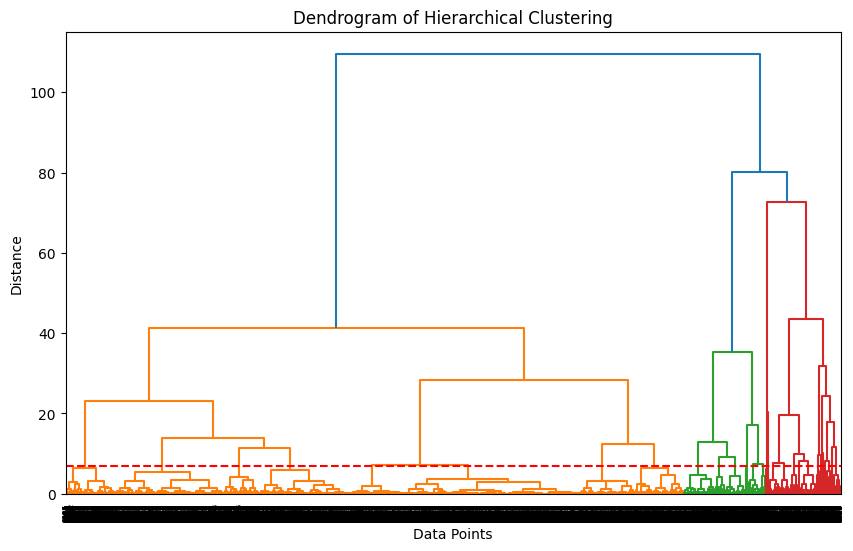

In [18]:
# Step: Plot the Dendrogram Again

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.axhline(y=7, color='r', linestyle='--')  # Add a horizontal line for the cut-off
plt.show()


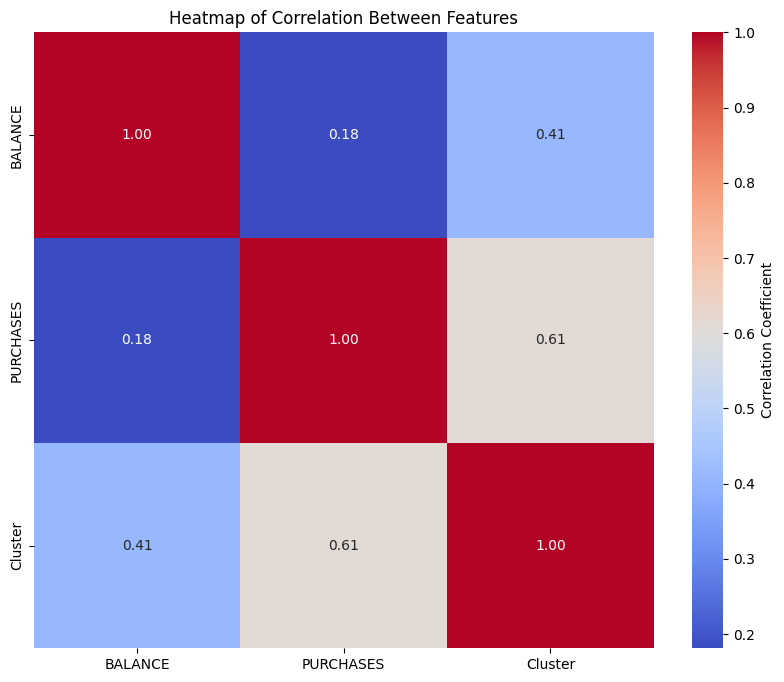

In [19]:
# Create a heatmap of the data, ordered by clusters
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Correlation Between Features")
plt.show()

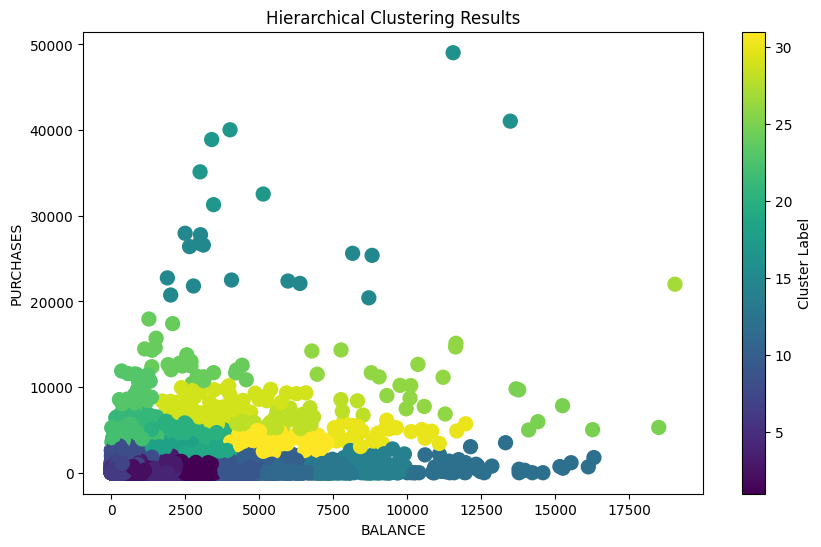

In [20]:
# Plot the clustered data points
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Hierarchical Clustering Results")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.colorbar(label='Cluster Label')
plt.show()

## Evaluating K_means vs Hierarchical Clustering

### Silhouette Score

In [21]:
silhouette_kmeans = silhouette_score(X, y_kmeans)
silhouette_HC = silhouette_score(X, y_hc)

print(f"K_means: {silhouette_kmeans:.2f}")
print(f"Hierarchical Clustering: {silhouette_HC:.2f}")

K_means: 0.52
Hierarchical Clustering: 0.56


### Rand Score

In [22]:
# we need to assume a true labels array
# using dbscan to generate it

dbscan = DBSCAN(eps = 0.5, min_samples=5)
true_labels = dbscan.fit_predict(X)

In [23]:
rand_kmeans = rand_score(true_labels, y_kmeans)
rand_hc = rand_score(true_labels, y_hc)

print(f"K_means: {rand_kmeans:.2f}")
print(f"Hierarchical Clustering: {rand_hc:.2f}")

K_means: 0.54
Hierarchical Clustering: 0.66


### Davies Bouldin score

In [24]:
db_kmeans = davies_bouldin_score(X, y_kmeans)
db_hc = davies_bouldin_score(X, y_hc)

print(f"K_means: {db_kmeans:.2f}")
print(f"Hierarchical Clustering: {db_hc:.2f}")

K_means: 0.69
Hierarchical Clustering: 0.92


### Final scoring

K_means: 1.75
Hierarchical Clustering: 2.14


<BarContainer object of 2 artists>

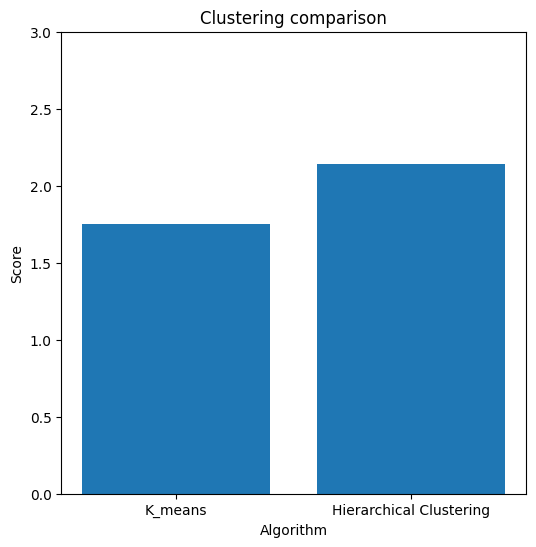

In [25]:
kmeans_scoring = silhouette_kmeans + rand_kmeans + db_kmeans
hc_scoring = silhouette_HC + rand_hc + db_hc

print(f"K_means: {kmeans_scoring:.2f}")
print(f"Hierarchical Clustering: {hc_scoring:.2f}")

plt.figure(figsize=(6,6))
plt.title('Clustering comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.ylim(0,3)
plt.bar(["K_means", "Hierarchical Clustering"], [kmeans_scoring, hc_scoring])

## Conclusion

Hierarchical Clustering scores the highest over the three metrics used.